Embedding
- 단어와 벡터를 연관짓는 강력하고 인기 있는 또 다른 방법은 단어 임베딩이라는 밀집 단어 벡터를 사용하는 것이다. 
- 원-핫 인코딩으로 만든 벡터는 희소하고(대부분 0으로 채워집니다) 고차원이다(어휘 사전에 있는 단어의 수와 차원이 같다). 
- 반면 단어 임베딩은 저차원의 실수형 벡터이다(희소 벡터의 반대인 밀집 벡터이다)
- 원-핫 인코딩으로 얻은 단어 벡터와 달리 단어 임베딩은 데이터로부터 학습된다. - 보통 256차원, 512차원 또는 큰 어휘 사전을 다룰 때는 1,024차원의 단어 임베딩을 사용한다.
- 반면 원-핫 인코딩은 (20,000개의 토큰으로 이루어진 어휘 사전을 만들려면) 20,000차원 또는 그 이상의 벡터일 경우가 많다. 
- 따라서 단어 임베딩이 더 많은 정보를 적은 차원에 저장한다.
- (문서 분류나 감성 예측과 같은) 관심 대상인 문제와 함께 단어 임베딩을 학습합니다. 이런 경우에는 랜덤한 단어 벡터로 시작해서 신경망의 가중치를 학습하는 것과 같은 방식으로 단어 벡터를 학습합니다.
- 풀려는 문제가 아니고 다른 머신 러닝 작업에서 미리 계산된 단어 임베딩을 로드합니다. 이를 사전 훈련된 단어 임베딩이라고 합니다.
- 실제 단어 임베딩 공간에서 의미 있는 기하학적 변환의 일반적인 예는 '성별' 벡터와 '복수(plural)' 벡터이다. 
- 예를 들어, 'king' 벡터에 'female' 벡터를 더하면 'queen' 벡터가 된다. 'plural' 벡터를 더하면 'kings'가 된다. 
- 단어 임베딩 공간은 전형적으로 이런 해석 가능하고 잠재적으로 유용한 수천 개의 벡터를 특성으로 가진다. 
- 세상에는 많은 다른 언어가 있고 언어는 특정 문화와 환경을 반영하기 때문에 서로 동일하지 않다. 
- 실제로 좋은 단어 임베딩 공간을 만드는 것은 문제에 따라 크게 달라진다. - 영어로 된 영화 리뷰 감성 분석 모델을 위한 완벽한 단어 임베딩 공간은 영어로 된 법률 문서 분류 모델을 위한 완벽한 임베딩 공간과 다를 것 이다. 특정 의미 관계의 중요성이 작업에 따라 다르기 때문이다.
- 따라서, 새로운 작업에는 새로운 임베딩을 학습하는 것이 타당하다. 
- 역전파를 사용해 쉽게 만들 수 있고 케라스를 사용하면 더 쉽다. Embedding 층의 가중치를 학습하면 된다.

In [1]:
!curl -O https://ai.stanford.edu/~amaas/data/sentiment/aclImdb_v1.tar.gz
!tar -xf aclImdb_v1.tar.gz


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 80.2M  100 80.2M    0     0  11.2M      0  0:00:07  0:00:07 --:--:-- 17.3M


In [2]:
ls

aclImdb/  aclImdb_v1.tar.gz  drive/  sample_data/


In [3]:
!rm -r aclImdb/train/unsup #삭제

In [4]:
!cat aclImdb/train/pos/4077_10.txt #불러오기

I first saw this back in the early 90s on UK TV, i did like it then but i missed the chance to tape it, many years passed but the film always stuck with me and i lost hope of seeing it TV again, the main thing that stuck with me was the end, the hole castle part really touched me, its easy to watch, has a great story, great music, the list goes on and on, its OK me saying how good it is but everyone will take there own best bits away with them once they have seen it, yes the animation is top notch and beautiful to watch, it does show its age in a very few parts but that has now become part of it beauty, i am so glad it has came out on DVD as it is one of my top 10 films of all time. Buy it or rent it just see it, best viewing is at night alone with drink and food in reach so you don't have to stop the film.<br /><br />Enjoy

In [180]:
#데이터 불러오기

import os

texts = []
labels = []

for label_type in ['neg','pos']:
  dir_name = os.path.join('./aclImdb/train', label_type)
  for fname in os.listdir(dir_name):
    if fname[-4:] == '.txt':
      f = open(os.path.join(dir_name, fname), encoding='utf8')
      texts.append(f.read())
      f.close()
      if label_type == 'neg':
        labels.append(0)
      else:
        labels.append(1)

In [181]:
print(len(texts), len(labels))

25000 25000


In [74]:
pd.DataFrame(texts)

,0
0,I just wondering what is the purpose of making...
1,foywonder's review of this cheap STV hits the ...
2,"First of all, Jon Bon Jovi doesn't seem to be ..."
3,"The saddest thing about this ""tribute"" is that..."
4,By far the worst movie of all time. Even Yaphe...
...,...
24995,When I think of Return of the Jedi I think epi...
24996,The first word which comes into my mind after ...
24997,"Lee Chang-dong's exceptional ""Secret Sunshine""..."
24998,What a class bit of British cinema! It's about...


In [75]:
pd.DataFrame(labels)

,0
0,0
1,0
2,0
3,0
4,0
...,...
24995,1
24996,1
24997,1
24998,1


In [182]:
#데이터 토큰화

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import numpy as np

max_length = 100 #한 문장에서 100개 단어 넘으면 그 이후는 버린다
max_words = 10000 #데이터셋에서 가장 빈도 높은 10,000개의 단어만 사용한다

tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(texts)
sequences = tokenizer.texts_to_sequences(texts)

In [104]:
pd.DataFrame(sequences)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,2153,2154,2155,2156,2157,2158,2159,2160,2161,2162,2163,2164,2165,2166,2167,2168,2169,2170,2171,2172,2173,2174,2175,2176,2177,2178,2179,2180,2181,2182,2183,2184,2185,2186,2187,2188,2189,2190,2191,2192
0,10,40,1525,48,6,1,1284,4,228,99.0,37.0,11.0,1.0,8775.0,2.0,5.0,931.0,33.0,23.0,6259.0,48.0,1656.0,212.0,358.0,126.0,1220.0,5.0,103.0,139.0,37.0,11.0,592.0,11.0,17.0,6.0,1747.0,31.0,463.0,339.0,150.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,730,4,11,702,1927,1,4416,20,1,416.0,94.0,249.0,22.0,329.0,9.0,8.0,417.0,22.0,89.0,3.0,601.0,4.0,3348.0,1822.0,122.0,80.0,1.0,930.0,1408.0,4.0,1.0,5975.0,5.0,184.0,16.0,3.0,758.0,4.0,6193.0,8.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,83,4,29,2633,8596,149,303,5,27,8.0,270.0,8.0,3.0,1359.0,17.0,292.0,16.0,1.0,82.0,21.0,35.0,218.0,102.0,2.0,1.0,335.0,766.0,1.0,223.0,17.0,457.0,724.0,44.0,22.0,398.0,12.0,8.0,327.0,2.0,332.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1,9259,152,41,11,3331,6,12,217,29.0,1.0,5120.0,583.0,1.0,894.0,962.0,1016.0,1848.0,4483.0,303.0,5.0,25.0,1045.0,1.0,223.0,210.0,118.0,3022.0,1835.0,31.0,4484.0,24.0,408.0,8.0,32.0,217.0,6887.0,1.0,365.0,2823.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,31,227,1,246,17,4,29,55,57,97.0,21.0,604.0,11.0,2798.0,10.0,25.0,553.0,12.0,1.0,17.0,13.0,1816.0,420.0,5.0,27.0,3658.0,1.0,2525.0,18.0,13.0,1189.0,5.0,2525.0,8.0,657.0,5.0,190.0,3070.0,4.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24995,51,10,101,4,991,4,1,6351,10,101.0,1706.0,1241.0,8416.0,68.0,8.0,47.0,35.0,48.0,504.0,32.0,218.0,760.0,5.0,1.0,17.0,21.0,5.0,757.0,33.0,23.0,728.0,5.0,1.0,34.0,68.0,79.0,499.0,5.0,190.0,177.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
24996,1,83,678,60,263,80,58,327,100,146.0,11.0,17.0,6.0,932.0,932.0,6.0,29.0,184.0,8.0,6799.0,294.0,6.0,896.0,14.0,207.0,8.0,70.0,2434.0,662.0,2.0,8.0,764.0,344.0,323.0,1.0,116.0,7.0,7.0,10.0,101.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
24997,845,9829,3155,1000,3912,6,1,682,88,2147.0,582.0,4.0,1.0,288.0,9.0,6.0,32.0,3505.0,4637.0,1199.0,106.0,415.0,20.0,1.0,4.0,1932.0,2.0,3.0,12.0,16.0,3.0,3337.0,4.0,194.0,243.0,1285.0,14.0,14.0,1.0,1437.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
24998,48,3,704,224,4,696,434,42,41,55.0,2.0,3.0,496.0,9320.0,209.0,5.0,4457.0,7.0,7.0,256.0,3164.0,5.0,3.0,224.0,4.0,2204.0,36.0,65.0,1928.0,11.0,1317.0,17.0,77.0,1969.0,1.0,3585.0,7.0,7.0,42.0,3.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [183]:
data = pad_sequences(sequences, max_length) #데이터 텐서, pad_sequences: 디폴트는 뒤쪽부터
labels = np.array(labels) #레이블 텐서
print(data.shape, labels.shape)

(25000, 100) (25000,)


In [83]:
pd.DataFrame(data)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99
0,6192,5,15,55,5,1339,2444,11,17,627,79,76,108,126,126,11,17,67,27,340,711,8,3,3734,18,15,249,21,8,3,747,58,906,34,6,207,372,5,58,220,...,3866,36,1,434,495,1,61,152,12,11,17,67,27,340,6,15,146,9,51,228,1,8422,5745,1025,10,241,740,238,378,15,693,1,434,2043,18,15,161,50,39,326
1,1622,6792,1,191,2016,220,149,190,7799,5,11,2,4716,5,1257,122,1,765,28,31,28,2253,191,2016,306,45,3,8776,4174,37,390,18,6,326,626,441,71,1331,36,1331,...,242,11,6,3,54,349,17,8,60,52,114,567,30,219,20,265,72,78,76,5,103,1,4,1,5171,190,3,3008,134,28,4,38,911,9654,3626,18,161,263,4,11
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,83,4,29,2633,8596,149,303,5,27,8,270,8,3,1359,17,292,16,1,82,21,...,3,959,1359,17,334,22,67,25,46,250,16,3,168,4,1,136,89,532,98,5674,402,9457,130,2,1079,32,2154,7364,766,10,532,5,25,25,1547,1,223,17,31,5514
3,24,815,63,21,1,82,93,184,33,200,25,74,366,39,24,5558,26,97,25,410,52,4311,2278,2,8,1,1306,15,3,3462,96,75,9,158,785,8,1,220,7,7,...,31,1,481,972,4,1,29,4,95,2903,1,2824,12,1095,360,25,51,33,1975,65,335,8423,30,1,341,7,7,3,614,120,63,2,44,22,368,116,6887,14,10,78
4,1072,31,4801,10,101,8169,68,8,28,133,4,11,17,1,189,12,33,571,5,27,1918,8,11,705,13,420,5,2218,6986,158,154,6793,139,49,567,8,1,17,1,1048,...,9092,78,4517,101,12,3628,235,25,74,3,97,33,25,90,9,98,50,574,1,61,55,256,141,985,43,1,3628,6,44,33,94,9,140,11,152,195,1200,192,15,5284
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24995,3,651,243,7667,544,5,22,1,115,170,13,4,261,1,315,299,42,477,86,3,19,36,1,399,4263,67,128,755,1,2184,4,55,16,42,2865,1,136,30,5060,9969,...,5,165,30,8,29,930,111,2,918,385,4162,197,2174,5588,2,2,51,2174,2671,1,879,5,9969,2,1046,315,299,6,3,3345,127,5,28,4,1,88,2758,8,434,476
24996,439,14,9,97,867,27,51,237,821,9,874,574,12,72,563,63,1143,2,1068,5,260,2418,2246,2,9772,5183,7,7,1,189,12,2973,36,11,1932,6,161,75,302,9,...,10,116,11,17,6,12,9,6,35,696,8,29,768,29,12,4144,2,2,2457,2,171,6,396,896,289,9,6,3,899,12,11,17,185,138,361,3715,155,43,4,744
24997,16,2197,149,1737,407,5,410,60,6,3,5863,8,407,1066,86,108,1053,384,1,7244,4,1,815,190,117,36,48,33,356,5,132,5,27,280,5,91,62,2,102,7,...,2070,8,3,19,35,2,2034,9,2671,12,222,161,14,603,14,918,40,1,2,4,7079,1000,3912,886,175,16,4311,1899,43,4,2,754,946,3,3312,1895,4,4884,2,1801
24998,1153,1059,2,149,384,22,7876,122,15,96,193,30,208,47,23,385,18,10,101,33,23,70,5996,2,760,5,1,102,1,153,23,2266,10,13,3,114,1945,16,5258,5805,...,4,1,433,17,1224,10,255,543,6420,1100,140,1,19,88,1326,613,46,81,184,69,446,70,7,7,10,59,1563,383,9,11,77,410,3,1212,696,209,70,287,3,1975


In [184]:
#훈련 세트와 검증 세트 분할

random_index = np.arange(25000)
np.random.shuffle(random_index) #부정 긍정 샘플을 섞는다
data = data[random_index]
labels = labels[random_index]

X_train = data[:200]
y_train = labels[:200]
X_val = data[200:10200]
y_val = labels[200:10200]

In [185]:
word_index = tokenizer.word_index
len(word_index)

88582

In [165]:
embeddings_index = {}
f = open(os.path.join('drive/MyDrive/glove.6B.100d.txt'), encoding="utf8")
for line in f:
    values = line.split()
    word = values[0]
    coefs = np.asarray(values[1:], dtype='float32')
    embeddings_index[word] = coefs
f.close()

In [166]:
embedding_dim = 100

embedding_matrix = np.zeros((max_words, embedding_dim))
for word, i in word_index.items():
    embedding_vector = embeddings_index.get(word)
    if i < max_words:
        if embedding_vector is not None: # 임베딩 인덱스에 없는 단어는 모두 0이 됩니다.
            embedding_matrix[i] = embedding_vector

In [191]:
from keras.models import Sequential
from keras.layers import Embedding, Flatten, Dense

model = Sequential()
model.add(Embedding(input_dim=max_words, input_length=max_length, output_dim=embedding_dim))
model.add(Flatten())
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential_34"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_29 (Embedding)    (None, 100, 100)          1000000   
                                                                 
 flatten_11 (Flatten)        (None, 10000)             0         
                                                                 
 dense_29 (Dense)            (None, 32)                320032    
                                                                 
 dense_30 (Dense)            (None, 1)                 33        
                                                                 
Total params: 1,320,065
Trainable params: 1,320,065
Non-trainable params: 0
_________________________________________________________________


In [178]:
model.layers[0].set_weights([embedding_matrix])
model.layers[0].trainable = False

In [186]:
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics='acc')
history = model.fit(X_train, y_train,
                    epochs=10,
                    batch_size=32,
                    validation_data=(X_val, y_val))
model.save_weights('pre_trained_glove_model.h5')

Epoch 1/10
7/7 [==============================] - 1s 105ms/step - loss: 2.3110 - acc: 0.5000 - val_loss: 0.7618 - val_acc: 0.5049
Epoch 2/10
7/7 [==============================] - 1s 88ms/step - loss: 0.5364 - acc: 0.7350 - val_loss: 0.6926 - val_acc: 0.5370
Epoch 3/10
7/7 [==============================] - 1s 91ms/step - loss: 0.5856 - acc: 0.7250 - val_loss: 0.8539 - val_acc: 0.5056
Epoch 4/10
7/7 [==============================] - 1s 94ms/step - loss: 0.2622 - acc: 0.9450 - val_loss: 0.7066 - val_acc: 0.5648
Epoch 5/10
7/7 [==============================] - 1s 89ms/step - loss: 0.4383 - acc: 0.7900 - val_loss: 0.7358 - val_acc: 0.5406
Epoch 6/10
7/7 [==============================] - 1s 87ms/step - loss: 0.1325 - acc: 1.0000 - val_loss: 0.7128 - val_acc: 0.5694
Epoch 7/10
7/7 [==============================] - 1s 86ms/step - loss: 0.0801 - acc: 0.9950 - val_loss: 0.9528 - val_acc: 0.5184
Epoch 8/10
7/7 [==============================] - 1s 90ms/step - loss: 0.0657 - acc: 1.0000 - va

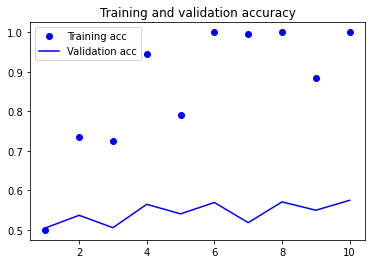

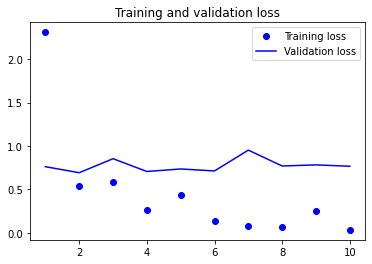

In [187]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

Conv1D 활용한 RNN

In [196]:
from keras.datasets import imdb
from tensorflow.keras.preprocessing import sequence

max_length=500  #한 문장에서 100개 단어 넘으면 그 이후는 버린다
max_features=10000 #데이터셋에서 가장 빈도 높은 10,000개의 단어만 사용한다

(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=max_features)

In [197]:
X_train = sequence.pad_sequences(X_train, max_length)
X_test = sequence.pad_sequences(X_test, max_length)
print(X_train.shape, X_test.shape)

(25000, 500) (25000, 500)


In [204]:
import keras
from keras import layers
from keras.models import Sequential

model = Sequential()
model.add(layers.Embedding(input_dim=max_features, input_length=max_length, output_dim=128))
model.add(layers.Conv1D(32,7, activation='relu'))
model.add(layers.MaxPooling1D(5))
model.add(layers.Conv1D(32,8,activation='relu'))
model.add(layers.GlobalMaxPooling1D())
model.add(layers.Dense(1))
model.summary()

Model: "sequential_37"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_32 (Embedding)    (None, 500, 128)          1280000   
                                                                 
 conv1d_16 (Conv1D)          (None, 494, 32)           28704     
                                                                 
 max_pooling1d_12 (MaxPoolin  (None, 98, 32)           0         
 g1D)                                                            
                                                                 
 conv1d_17 (Conv1D)          (None, 91, 32)            8224      
                                                                 
 global_max_pooling1d_4 (Glo  (None, 32)               0         
 balMaxPooling1D)                                                
                                                                 
 dense_33 (Dense)            (None, 1)               

In [201]:
model.compile(optimizer=keras.optimizers.RMSprop(learning_rate=1e-4),
              loss='binary_crossentropy',
              metrics='acc')
history=model.fit(X_train,y_train,
                  epochs=10,
                  batch_size=128,
                  validation_split=0.2)

Epoch 1/10
157/157 [==============================] - 2s 11ms/step - loss: 0.7906 - acc: 0.5076 - val_loss: 0.6892 - val_acc: 0.5340
Epoch 2/10
157/157 [==============================] - 1s 9ms/step - loss: 0.6704 - acc: 0.6479 - val_loss: 0.6670 - val_acc: 0.6438
Epoch 3/10
157/157 [==============================] - 1s 9ms/step - loss: 0.6278 - acc: 0.7462 - val_loss: 0.6174 - val_acc: 0.7340
Epoch 4/10
157/157 [==============================] - 1s 9ms/step - loss: 0.5374 - acc: 0.8062 - val_loss: 0.4947 - val_acc: 0.8046
Epoch 5/10
157/157 [==============================] - 1s 9ms/step - loss: 0.4042 - acc: 0.8523 - val_loss: 0.4102 - val_acc: 0.8426
Epoch 6/10
157/157 [==============================] - 1s 9ms/step - loss: 0.3404 - acc: 0.8771 - val_loss: 0.3969 - val_acc: 0.8510
Epoch 7/10
157/157 [==============================] - 1s 9ms/step - loss: 0.2995 - acc: 0.8939 - val_loss: 0.4062 - val_acc: 0.8580
Epoch 8/10
157/157 [==============================] - 2s 10ms/step - loss: 

In [202]:
model.evaluate(X_test, y_test)

782/782 [==============================] - 2s 2ms/step - loss: 0.4484 - acc: 0.8647


[0.44840672612190247, 0.8646799921989441]

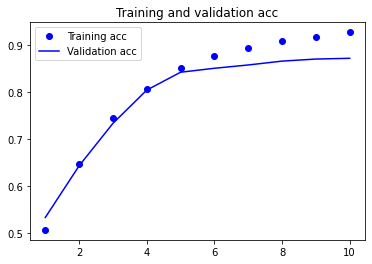

In [203]:
import matplotlib.pyplot as plt

loss = history.history['acc']
val_loss = history.history['val_acc']
plt.figure()
plt.plot(range(1,11), loss, 'bo', label='Training acc')
plt.plot(range(1,11), val_loss, 'b', label='Validation acc')
plt.title('Training and validation acc')
plt.legend()
plt.show()

검증 정확도는 LSTM보다 조금 낮지만 더빠르게 실행됨. 이는 단어 수준의 감성분류 작업에 순환 네트워크를 대신하여 빠르고 경제적인 1D 컨브넷을 사용할 수 있음을 보여줌